In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [2]:
score_boa_vista = pd.read_csv('base/score.txt', sep=';')
modelo_treinado = pd.read_csv('resultados/resultado_final.csv', sep=',')

In [4]:
score_boa_vista.columns

Index(['posicao_maxima', 'ScoreBVS', 'ID_VINCULO', 'co_ope', 'dias_atraso',
       'dt_rec', 'dt_inc', 'dt_base', 'vlr_avista', 'vlr_base', 'vlr_pg',
       'ic_14004', 'ic_13002', 'ic_ss', 'ic_rj', 'ic_tele', 'ic_sombreado',
       'IC_ULTIMOS_LOTES', 'dt_nasc', 'sexo', 'renda', 'renda_liq', 'dt_relac',
       'co_cart', 'co_prof', 'cep'],
      dtype='object')

In [5]:
modelo_treinado.columns

Index(['Unnamed: 0', 'co_ope', 'dt_base', 'vlr_base', 'dt_nasc', 'sexo',
       'renda', 'renda_liq', 'dt_relac', 'co_cart', 'co_prof', 'cep',
       'predicao', 'score'],
      dtype='object')

In [46]:
if len(modelo_treinado) == len(score_boa_vista):
    modelo_treinado['ScoreBVS'] = score_boa_vista['ScoreBVS'] * 0.2
    modelo_treinado['ID_VINCULO'] = score_boa_vista['ID_VINCULO']
    modelo_treinado['pagou'] =  score_boa_vista['dt_rec'].apply(lambda x: 0 if pd.isna(x) else 1)
else:
    print("Os DataFrames não têm o mesmo número de linhas e não podem ser combinados diretamente.")
modelo_treinado.rename(columns={'score': 'MunaScore'}, inplace=True)
modelo_treinado = modelo_treinado[['ID_VINCULO', 'co_ope', 'dt_base', 'vlr_base', 'dt_nasc', 'sexo', 'renda', 'renda_liq', 'dt_relac', 'co_cart', 'co_prof', 'cep', 'ScoreBVS', 'predicao', 'MunaScore', 'pagou']]

In [57]:
modelo_treinado.sort_values('pagou', ascending=False).head(3)

,ID_VINCULO,co_ope,dt_base,vlr_base,dt_nasc,sexo,renda,renda_liq,dt_relac,co_cart,co_prof,cep,ScoreBVS,predicao,MunaScore,pagou,faixa_ScoreBVS,faixa_MunaScore
484050,{2B6FA4EB-9FD6-4EB5-8C4D-61DF30739785},23,45104,11131.60,21441.0,1,5816.73,2808.3,35589.0,28,179,280,58.6,0,46.0,1,50-74.99,25-49.99
2150207,{529946B0-37BD-4E00-BC60-E135F92751D5},20,45104,2599.74,31417.0,1,1465.70,1465.7,40908.0,65,234,647,62.6,1,90.0,1,50-74.99,75-100
470781,{DAD448C5-A56A-4AED-9F4F-C514C61A21A0},46,45205,2620.46,32094.0,0,5035.92,4155.0,42269.0,11,396,14866,51.8,0,38.0,1,50-74.99,25-49.99


/var/folders/b0/y_32dyyj3bqb0dh1yml2wpb5c3s8c9/T/ipykernel_87629/2835092095.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_ScoreBVS_pagou = modelo_treinado_pagou.groupby(['faixa_ScoreBVS']).size()
/var/folders/b0/y_32dyyj3bqb0dh1yml2wpb5c3s8c9/T/ipykernel_87629/2835092095.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_MunaScore_pagou = modelo_treinado_pagou.groupby(['faixa_MunaScore']).size()


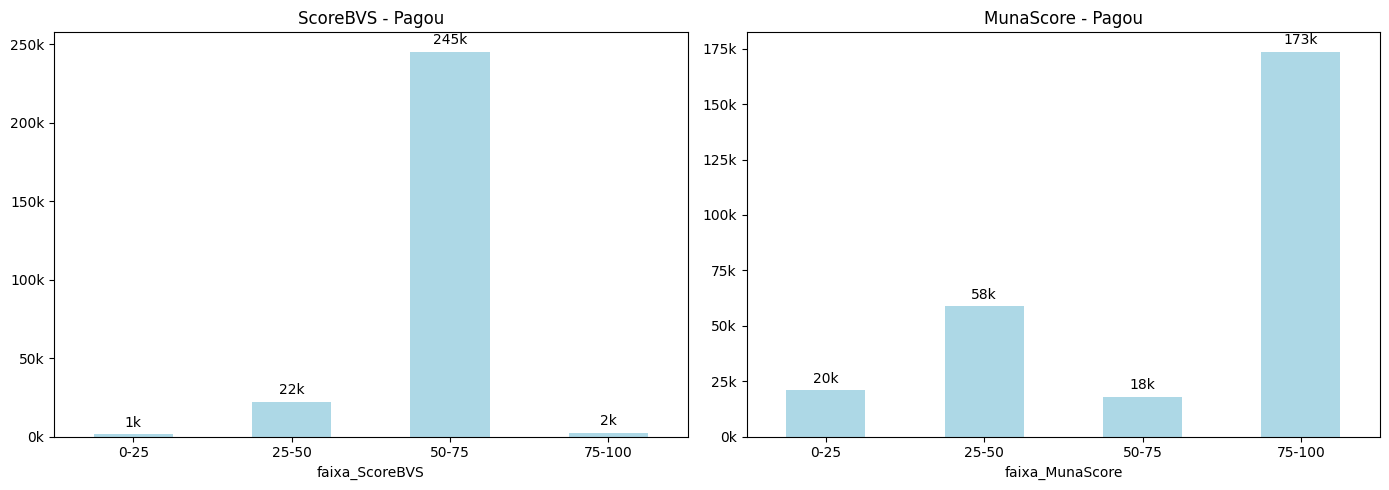

In [65]:

# Função auxiliar para formatar o eixo y
def k_formatter(x, pos):
    return f'{int(x/1000)}k'

# Definindo as faixas de score
bins = [0, 25, 50, 75, 100]

# Criando as faixas de score para 'ScoreBVS' e 'MunaScore'
modelo_treinado['faixa_ScoreBVS'] = pd.cut(modelo_treinado['ScoreBVS'], bins, labels=["0-25", "25-50", "50-75", "75-100"])
modelo_treinado['faixa_MunaScore'] = pd.cut(modelo_treinado['MunaScore'], bins, labels=["0-25", "25-50", "50-75", "75-100"])

# Filtrar o DataFrame para incluir apenas quem pagou
modelo_treinado_pagou = modelo_treinado[modelo_treinado['pagou'] == 1]

# Agrupando e contando por faixas para quem pagou
contagem_ScoreBVS_pagou = modelo_treinado_pagou.groupby(['faixa_ScoreBVS']).size()
contagem_MunaScore_pagou = modelo_treinado_pagou.groupby(['faixa_MunaScore']).size()

# Configuração dos gráficos lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Define a formatação do eixo y para 'k' usando a função auxiliar
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))

# Gráfico para 'ScoreBVS' para quem pagou
bars1 = contagem_ScoreBVS_pagou.plot(kind='bar', ax=axes[0], color='lightblue', title='ScoreBVS - Pagou', rot=0)

# Gráfico para 'MunaScore' para quem pagou
bars2 = contagem_MunaScore_pagou.plot(kind='bar', ax=axes[1], color='lightblue', title='MunaScore - Pagou', rot=0)

# Adicionando rótulos de valor nas barras
for bar in bars1.containers[0]:
    height = bar.get_height()
    axes[0].annotate(f'{k_formatter(height, None)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

for bar in bars2.containers[0]:
    height = bar.get_height()
    axes[1].annotate(f'{k_formatter(height, None)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()

/var/folders/b0/y_32dyyj3bqb0dh1yml2wpb5c3s8c9/T/ipykernel_87629/3160805936.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_ScoreBVS_pagou = modelo_treinado_pagou.groupby(['faixa_ScoreBVS']).size()
/var/folders/b0/y_32dyyj3bqb0dh1yml2wpb5c3s8c9/T/ipykernel_87629/3160805936.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_MunaScore_pagou = modelo_treinado_pagou.groupby(['faixa_MunaScore']).size()


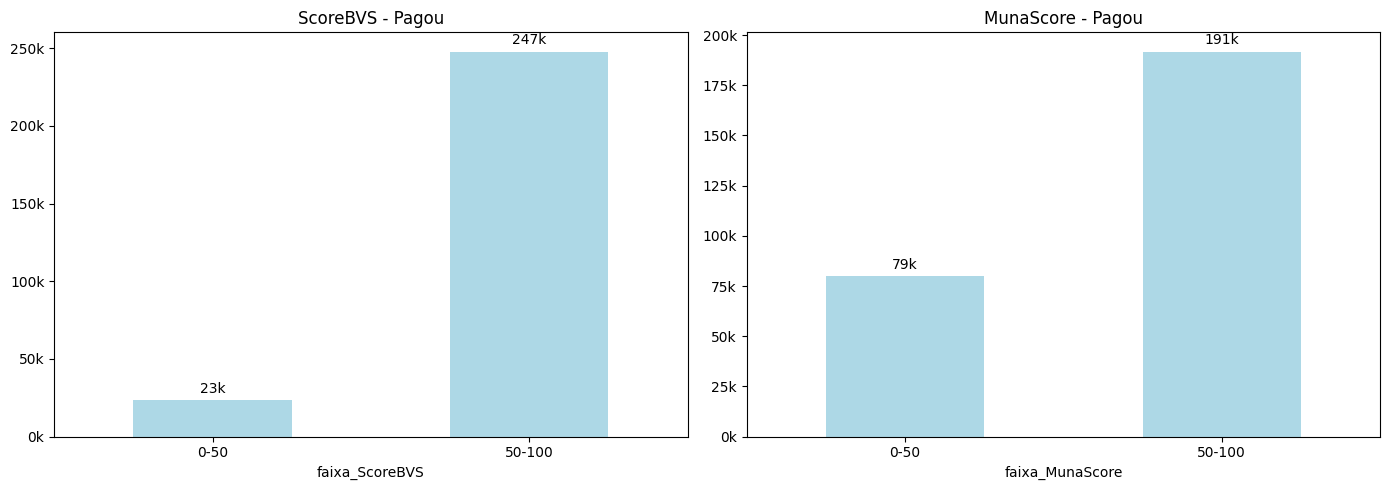

In [69]:

# Função auxiliar para formatar o eixo y
def k_formatter(x, pos):
    return f'{int(x/1000)}k'

# Definindo as faixas de score
bins = [0, 50, 100]

# Criando as faixas de score para 'ScoreBVS' e 'MunaScore'
modelo_treinado['faixa_ScoreBVS'] = pd.cut(modelo_treinado['ScoreBVS'], bins, labels=["0-50", "50-100"])
modelo_treinado['faixa_MunaScore'] = pd.cut(modelo_treinado['MunaScore'], bins, labels=["0-50", "50-100"])

# Filtrar o DataFrame para incluir apenas quem pagou
modelo_treinado_pagou = modelo_treinado[modelo_treinado['pagou'] == 1]

# Agrupando e contando por faixas para quem pagou
contagem_ScoreBVS_pagou = modelo_treinado_pagou.groupby(['faixa_ScoreBVS']).size()
contagem_MunaScore_pagou = modelo_treinado_pagou.groupby(['faixa_MunaScore']).size()

# Configuração dos gráficos lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Define a formatação do eixo y para 'k' usando a função auxiliar
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))

# Gráfico para 'ScoreBVS' para quem pagou
bars1 = contagem_ScoreBVS_pagou.plot(kind='bar', ax=axes[0], color='lightblue', title='ScoreBVS - Pagou', rot=0)

# Gráfico para 'MunaScore' para quem pagou
bars2 = contagem_MunaScore_pagou.plot(kind='bar', ax=axes[1], color='lightblue', title='MunaScore - Pagou', rot=0)

# Adicionando rótulos de valor nas barras
for bar in bars1.containers[0]:
    height = bar.get_height()
    axes[0].annotate(f'{k_formatter(height, None)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

for bar in bars2.containers[0]:
    height = bar.get_height()
    axes[1].annotate(f'{k_formatter(height, None)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()
plt.show()